In [ ]:
pip install kaggle


In [ ]:
mkdir ~/.kaggle


In [ ]:
cp kaggle.json ~/.kaggle/

In [ ]:
import random, os, glob
import numpy as np
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dropout, Dense, Conv2D, MaxPool2D, Flatten, Reshape, BatchNormalization, GlobalAveragePooling2D
from keras.callbacks import EarlyStopping
from keras import backend
import librosa # to demonstrate the creation of a mel spectrogram
from librosa.display import specshow
import matplotlib.pyplot as plt
import IPython.display as ipd
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [ ]:
! kaggle datasets download andradaolteanu/gtzan-dataset-music-genre-classification

Dataset URL: https://www.kaggle.com/datasets/andradaolteanu/gtzan-dataset-music-genre-classification
License(s): other
 99% 1.20G/1.21G [00:08<00:00, 231MB/s]
100% 1.21G/1.21G [00:08<00:00, 157MB/s]


In [ ]:
! unzip gtzan-dataset-music-genre-classification.zip

Archive:  gtzan-dataset-music-genre-classification.zip
  inflating: Data/features_30_sec.csv  
  inflating: Data/features_3_sec.csv  
  inflating: Data/genres_original/blues/blues.00000.wav  
  inflating: Data/genres_original/blues/blues.00001.wav  
  inflating: Data/genres_original/blues/blues.00002.wav  
  inflating: Data/genres_original/blues/blues.00003.wav  
  inflating: Data/genres_original/blues/blues.00004.wav  
  inflating: Data/genres_original/blues/blues.00005.wav  
  inflating: Data/genres_original/blues/blues.00006.wav  
  inflating: Data/genres_original/blues/blues.00007.wav  
  inflating: Data/genres_original/blues/blues.00008.wav  
  inflating: Data/genres_original/blues/blues.00009.wav  
  inflating: Data/genres_original/blues/blues.00010.wav  
  inflating: Data/genres_original/blues/blues.00011.wav  
  inflating: Data/genres_original/blues/blues.00012.wav  
  inflating: Data/genres_original/blues/blues.00013.wav  
  inflating: Data/genres_original/blues/blues.00014.wa

In [ ]:
import matplotlib.pyplot as plt
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import cv2
from keras.preprocessing.image import ImageDataGenerator
from keras import backend as K
import keras
from keras.models import Sequential, Model,load_model
from tensorflow.keras.optimizers import SGD, Adam
from keras.callbacks import EarlyStopping,ModelCheckpoint
from keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D,MaxPool2D, Dropout
from keras.preprocessing import image
from keras.initializers import glorot_uniform
from tensorflow.keras.applications import inception_v3
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import librosa
import librosa.display
from tqdm import tqdm
from sklearn.model_selection import train_test_split
import sklearn.preprocessing
from tensorflow.keras.metrics import AUC
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import shutil
import os
from keras.callbacks import ReduceLROnPlateau
label_csv = '/content/Data/features_30_sec.csv'
audio_fpath = "/content/Data/genres_original/"

In [ ]:
def create_dir(dirname):
    if os.path.exists(dirname):
        pass
    else:
        os.makedirs(dirname)

In [ ]:
df = pd.read_csv(label_csv)

print(df.head())
df.shape

          filename  length  chroma_stft_mean  chroma_stft_var  rms_mean  \
0  blues.00000.wav  661794          0.350088         0.088757  0.130228   
1  blues.00001.wav  661794          0.340914         0.094980  0.095948   
2  blues.00002.wav  661794          0.363637         0.085275  0.175570   
3  blues.00003.wav  661794          0.404785         0.093999  0.141093   
4  blues.00004.wav  661794          0.308526         0.087841  0.091529   

    rms_var  spectral_centroid_mean  spectral_centroid_var  \
0  0.002827             1784.165850          129774.064525   
1  0.002373             1530.176679          375850.073649   
2  0.002746             1552.811865          156467.643368   
3  0.006346             1070.106615          184355.942417   
4  0.002303             1835.004266          343399.939274   

   spectral_bandwidth_mean  spectral_bandwidth_var  ...  mfcc16_var  \
0              2002.449060            85882.761315  ...   52.420910   
1              2039.036516        

(1000, 60)

In [ ]:
trainframe = []
for index, row in tqdm(df.iterrows()):
    file_name = os.path.join(os.path.abspath(audio_fpath),str(row['label'] + '/'), str(row['filename']))
    dirname='./prep/' + row['label']
    if not os.path.exists(dirname):
        create_dir(dirname)
    try:
        data, sr = librosa.load(file_name)
    except:
        print(str(row['filename'])+ ' is not a valid file')
    else:

        file_name = os.path.join(os.path.abspath(audio_fpath),str(row['label'] + '/'), str(row['filename']))
        mfcc = []
        length = row['length']/10
        start = 0
        end = length
        for i in range(10):
            out_file = dirname+ '/' + row['filename'].split('.wav')[0] + '.' + str(i) + '.png'
            file_name=(out_file.split('/')[-1])
            label=(row['label'])
            trainframe.append([file_name, label])
            if os.path.exists(out_file):
                t = end
                start = end
                end = t + length
                continue
            frag = data[int(start):int(end)]
            mfcc = librosa.feature.mfcc(y = frag, sr = sr, n_mfcc=20)
            mfcc = np.subtract(mfcc, np.mean(mfcc))
            mfcc_gram = librosa.amplitude_to_db(mfcc, ref=np.min)
            librosa.display.specshow(mfcc_gram, sr=sr)
            plt.colorbar(format='%+2.0f dB')
            plt.savefig(out_file)
            plt.clf()
            t = end
            start = end
            end = t + length

554it [20:29,  1.98s/it]<ipython-input-10-6ec901c04d0f>:8: UserWarning: PySoundFile failed. Trying audioread instead.
  data, sr = librosa.load(file_name)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
555it [20:30,  1.48s/it]

jazz.00054.wav is not a valid file


1000it [36:25,  2.19s/it]


<Figure size 640x480 with 0 Axes>

In [ ]:
np.array(trainframe).shape

(9990, 2)

In [ ]:
feature_df = pd.DataFrame(trainframe, columns=['filename','class'])

feature_df.head()

,filename,class
0,blues.00000.0.png,blues
1,blues.00000.1.png,blues
2,blues.00000.2.png,blues
3,blues.00000.3.png,blues
4,blues.00000.4.png,blues


In [ ]:
x = np.array(feature_df['filename'].tolist())

x.shape

(9990,)

In [ ]:
target = np.array(feature_df['class'].tolist())

In [ ]:
y_new = pd.get_dummies(target)
print(y_new.shape)
y_new.head()

(9990, 10)


,blues,classical,country,disco,hiphop,jazz,metal,pop,reggae,rock
0,True,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False,False,False
4,True,False,False,False,False,False,False,False,False,False


In [ ]:
data = feature_df
data['filename'] = feature_df['filename'].apply(lambda x:x.replace('.wav', '.png'))
data['temp'] = feature_df['class'] +'/' + feature_df['filename']
data['path'] = data['temp']
# .apply(lambda x:'./prep/' + x)
data = data[['filename','path', 'class']]
# data['class'] = data['target']
data.head()

,filename,path,class
0,blues.00000.0.png,blues/blues.00000.0.png,blues
1,blues.00000.1.png,blues/blues.00000.1.png,blues
2,blues.00000.2.png,blues/blues.00000.2.png,blues
3,blues.00000.3.png,blues/blues.00000.3.png,blues
4,blues.00000.4.png,blues/blues.00000.4.png,blues


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
         data, y_new, test_size=0.2, random_state=15)

print(str(X_train.shape)+ ', ' + str(X_test.shape))
datagen = ImageDataGenerator()
it = datagen.flow_from_dataframe(
    data,
    x_col="path",
    y_col="class",batch_size=1,
    directory='./prep/')

inp = Input(shape = next(it)[0][0].shape)
print(inp)
model = inception_v3.InceptionV3(
    include_top=False,
    weights="imagenet",
    classes=10,
    input_tensor = inp
)
# y_train
X_test

(7992, 3), (1998, 3)
Found 9990 validated image filenames belonging to 10 classes.
KerasTensor(type_spec=TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name='input_1'), name='input_1', description="created by layer 'input_1'")
87910968/87910968 [==============================] - 0s 0us/step


,filename,path,class
4534,hiphop.00053.4.png,hiphop/hiphop.00053.4.png,hiphop
8806,reggae.00081.6.png,reggae/reggae.00081.6.png,reggae
5284,jazz.00028.4.png,jazz/jazz.00028.4.png,jazz
3624,disco.00062.4.png,disco/disco.00062.4.png,disco
3201,disco.00020.1.png,disco/disco.00020.1.png,disco
...,...,...,...
7019,pop.00002.9.png,pop/pop.00002.9.png,pop
468,blues.00046.8.png,blues/blues.00046.8.png,blues
9851,rock.00086.1.png,rock/rock.00086.1.png,rock
311,blues.00031.1.png,blues/blues.00031.1.png,blues


In [ ]:
for layer in model.layers:
    layer.trainable=False

In [ ]:
new_model = Sequential()
new_model.add(model)
new_model.add(Flatten())
new_model.add(BatchNormalization())
new_model.add(Dense(128, activation='relu'))
new_model.add(Dropout(0.5))
new_model.add(BatchNormalization())
new_model.add(Dense(64, activation='relu'))
new_model.add(Dropout(0.5))
new_model.add(Dense(10, activation='softmax'))

new_model.compile(loss = 'categorical_crossentropy',optimizer='adam',metrics=['accuracy', AUC()])
print(new_model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 6, 6, 2048)        21802784  
                                                                 
 flatten (Flatten)           (None, 73728)             0         
                                                                 
 batch_normalization_94 (Ba  (None, 73728)             294912    
 tchNormalization)                                               
                                                                 
 dense (Dense)               (None, 128)               9437312   
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 batch_normalization_95 (Ba  (None, 128)               512       
 tchNormalization)                                      

In [ ]:
es = EarlyStopping(
    monitor='val_accuracy',
    restore_best_weights=True,
    patience=20,
    min_delta = 0.001
)
lrr = ReduceLROnPlateau(monitor='val_accuracy',
                        patience=3,
                        verbose=1,
                        factor=0.5,
                        min_lr=0.00001)
history = new_model.fit(datagen.flow_from_dataframe(
    X_train,
    x_col="path",
    y_col="class",
    batch_size=512,
    directory = './prep'
),
              validation_data=datagen.flow_from_dataframe(
            X_test,
            x_col="path",
            y_col="class",

                  batch_size=100,
                  directory = './prep'),
              epochs=30,
              callbacks=[es])

Found 7992 validated image filenames belonging to 10 classes.
Found 1998 validated image filenames belonging to 10 classes.
Epoch 1/30
16/16 [==============================] - 154s 7s/step - loss: 2.4039 - accuracy: 0.2400 - auc: 0.6745 - val_loss: 9.1576 - val_accuracy: 0.2903 - val_auc: 0.6341
Epoch 2/30
16/16 [==============================] - 90s 6s/step - loss: 2.0982 - accuracy: 0.2842 - auc: 0.7338 - val_loss: 3.8762 - val_accuracy: 0.3108 - val_auc: 0.7079
Epoch 3/30
16/16 [==============================] - 90s 6s/step - loss: 1.9599 - accuracy: 0.3202 - auc: 0.7648 - val_loss: 2.5368 - val_accuracy: 0.3584 - val_auc: 0.7588
Epoch 4/30
16/16 [==============================] - 91s 6s/step - loss: 1.9014 - accuracy: 0.3315 - auc: 0.7801 - val_loss: 2.0118 - val_accuracy: 0.3769 - val_auc: 0.7948
Epoch 5/30
16/16 [==============================] - 92s 6s/step - loss: 1.8238 - accuracy: 0.3514 - auc: 0.7974 - val_loss: 1.8597 - val_accuracy: 0.3799 - val_auc: 0.8075
Epoch 6/30
16/1

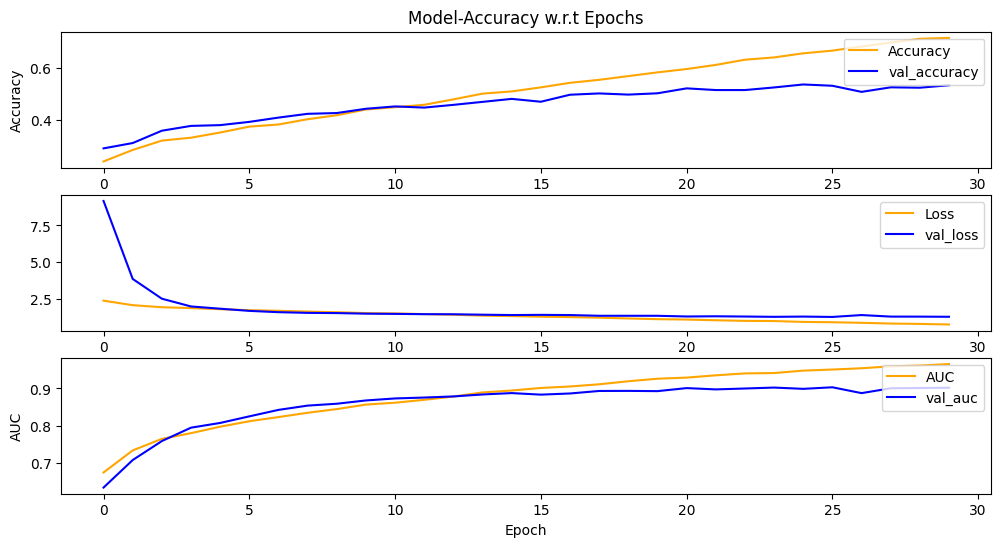

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(12,6))
ax2.plot(history.history['loss'], color='orange', label='Loss')
ax2.plot(history.history['val_loss'], color='blue', label='val_loss')
ax2.legend(loc='upper right')
ax1.plot(history.history['accuracy'], label='Accuracy', color='orange')
ax1.plot(history.history['val_accuracy'], label='val_accuracy', color='blue')
ax1.legend(loc="upper right")
ax1.set_title("Model-Accuracy w.r.t Epochs", loc='center')
plt.xlabel("Epochs")
plt.ylabel("Loss")
ax1.set_xlabel("Epoch")
ax1.set_ylabel("Accuracy")
ax3.plot(history.history['auc'], color='orange', label='AUC')
ax3.plot(history.history['val_auc'], color='blue', label='val_auc')
ax3.set_xlabel("Epoch")
ax3.set_ylabel("AUC")
ax3.legend(loc='upper right')
plt.savefig('model_acc_Inception_GTZAN.png')

In [ ]:
X_test.head()

,filename,path,class
4534,hiphop.00053.4.png,hiphop/hiphop.00053.4.png,hiphop
8806,reggae.00081.6.png,reggae/reggae.00081.6.png,reggae
5284,jazz.00028.4.png,jazz/jazz.00028.4.png,jazz
3624,disco.00062.4.png,disco/disco.00062.4.png,disco
3201,disco.00020.1.png,disco/disco.00020.1.png,disco


In [ ]:
test_dat = ImageDataGenerator()
test_gen = test_dat.flow_from_dataframe(data,
                                        x_col="path",
                                        y_col="class",
                                        batch_size=100,
                                        class_mode='categorical',
                                        shuffle = False,
                                        directory = './prep')

labels = pd.get_dummies(np.array(test_gen.labels))
y_pred = new_model.predict(test_gen,steps =9990)
labels.shape

Found 9990 validated image filenames belonging to 10 classes.
 100/9990 [..............................] - ETA: 2:38:25

9990/9990 [==============================] - 98s 10ms/step


(9990, 10)

In [ ]:
y_pred_classes = np.argmax(np.array(y_pred), axis=1)

y_pred_classes

array([0, 0, 0, ..., 0, 9, 9])

In [ ]:
y_true = np.argmax(np.array(labels), axis=1)

y_true

array([0, 0, 0, ..., 9, 9, 9])

In [ ]:
print(np.mean(y_pred_classes == y_true))
m = AUC()
m.update_state(labels, y_pred)
print(m.result())

0.7994994994994995
tf.Tensor(0.97519076, shape=(), dtype=float32)


<Figure size 640x480 with 0 Axes>

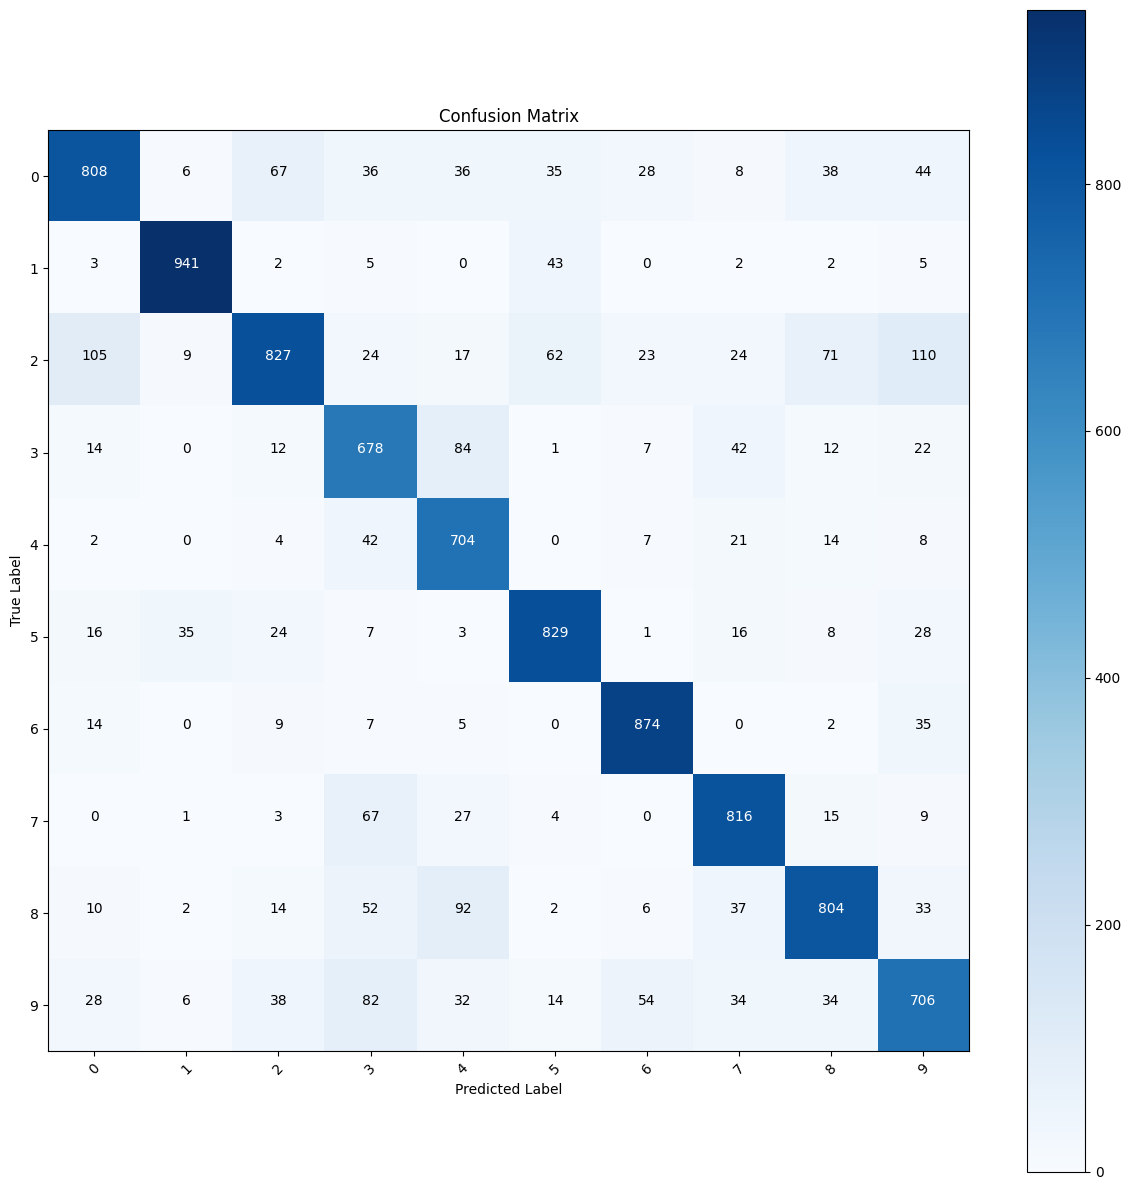

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_pred_classes, y_true,)
import itertools
plt.clf()
fig = plt.figure(figsize = (12,12))
ax = fig.add_subplot(111)
ax.set_aspect(1)
plt.imshow(cm, cmap = plt.cm.Blues, interpolation='nearest')

plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(len(range(10)))
plt.xticks(tick_marks, range(10), rotation=45)
plt.yticks(tick_marks, range(10))
thresh = cm.max()/2
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i , cm[i,j], horizontalalignment="center", color="white" if cm[i,j]>thresh else "black")

plt.tight_layout()
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.savefig('con_matrix_Inception_GTZAN.png')